## ML Lab Exam Prep

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

#### Data Load

In [67]:
data = pd.read_csv("Weather.csv")

#### Data Head (Starting 5 lines)

In [68]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.56,22.22,23.89,0.00,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.89,21.67,25.56,0.00,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.11,22.22,24.44,0.00,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.67,22.22,24.44,0.00,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.67,21.67,24.44,0.00,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Type

In [69]:
data.dtypes

STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

### Number of null values in data

In [70]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

#### Data Describe 

In [71]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.00,532.00,119040.00,119040.00,119040.00,119040.00,119040.00,119040.00,533.00,532.00,...,0.00,0.00,0.00,0.00,525.00,0.00,0.00,0.00,0.00,0.00
mean,29659.44,37.77,27.05,17.79,22.41,43.81,6.73,15.80,27.00,20.40,...,NaN,NaN,NaN,NaN,12.09,NaN,NaN,NaN,NaN,NaN
std,20953.21,10.30,8.72,8.33,8.30,1.14,3.43,8.79,15.22,5.56,...,NaN,NaN,NaN,NaN,5.73,NaN,NaN,NaN,NaN,NaN
min,10001.00,18.52,-33.33,-38.33,-35.56,40.00,1.00,1.00,2.00,10.00,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
25%,11801.00,29.63,25.56,15.00,20.56,43.00,4.00,8.00,11.00,16.00,...,NaN,NaN,NaN,NaN,8.50,NaN,NaN,NaN,NaN,NaN
50%,22508.00,37.04,29.44,21.11,25.56,44.00,7.00,16.00,32.00,20.00,...,NaN,NaN,NaN,NaN,11.60,NaN,NaN,NaN,NaN,NaN
75%,33501.00,43.06,31.67,23.33,27.22,45.00,10.00,23.00,34.00,23.25,...,NaN,NaN,NaN,NaN,15.00,NaN,NaN,NaN,NaN,NaN
max,82506.00,75.93,50.00,34.44,40.00,45.00,12.00,31.00,78.00,41.00,...,NaN,NaN,NaN,NaN,23.90,NaN,NaN,NaN,NaN,NaN


In [72]:
data.describe(include='object')

,Date,Precip,Snowfall,PoorWeather,PRCP,SNF,TSHDSBRSGF
count,119040,119040,117877.00,34237,117108,117877.00,34237
unique,2192,540,42.00,39,540,42.00,39
top,1945-4-16,0,0.00,1,0,0.00,1
freq,122,64267,86090.00,25846,62335,86090.00,25846


### Data Shape

In [73]:
data.shape[0] #Rows

119040

In [74]:
data.shape[1] #Columns

31

In [75]:
data.shape

(119040, 31)

### Dealing with Null values

In [76]:
# Dropping NaN rows 
data = data.dropna(subset = ['Snowfall','PRCP','MAX','MIN','MEA','SNF'])

In [77]:
data.shape

(115697, 31)

In [78]:
# Dropping redundant columns
data = data.drop(columns = ['PRCP'])

In [79]:
# Dropping NaN columns
data = data.dropna(axis='columns')

In [80]:
data.shape

(115697, 14)

In [81]:
data.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [82]:
data.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,115697.00,115697.00,115697.00,115697.00,115697.00,115697.00,115697.00,115697.00,115697.00,115697.00
mean,29806.53,27.49,18.14,22.82,43.82,6.73,15.79,81.48,64.65,73.07
std,20964.04,7.96,7.83,7.62,1.13,3.42,8.80,14.32,14.09,13.72
min,10001.00,-33.33,-38.33,-35.56,40.00,1.00,1.00,-28.00,-37.00,-32.00
25%,11801.00,25.56,15.56,21.11,43.00,4.00,8.00,78.00,60.00,70.00
50%,22509.00,29.44,21.11,25.56,44.00,7.00,16.00,85.00,70.00,78.00
75%,33501.00,31.67,23.33,27.22,45.00,10.00,23.00,89.00,74.00,81.00
max,82506.00,50.00,34.44,40.00,45.00,12.00,31.00,122.00,94.00,104.00


### Dealing with Outliers

In [83]:
categorical_feature = list(data.select_dtypes(include= 'object'))
numerical_feature = list(data.select_dtypes(exclude= 'object'))

In [84]:
# Outliers

# data = data[(np.abs(stats.zscore(data[numerical_feature])) < 3).all(axis=1)]

# or

z = np.abs(stats.zscore(data[numerical_feature]))
data = data[(z < 3).all(axis=1)] # Remove any outliers with Z-score > 3 or < -3

In [86]:
data.shape

(111473, 14)

### Removing meaningless data from columns

In [91]:
# Removing non-numeric data and converting date to datetime format
data['Precip'] = pd.to_numeric(data['Precip'],errors='coerce')
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [96]:
data.dtypes

STA           int64
Date         object
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall     object
YR            int64
MO            int64
DA            int64
MAX         float64
MIN         float64
MEA         float64
SNF          object
Year          int32
dtype: object

In [101]:
data.applymap(np.isreal)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF,Year
0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
119036,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
119037,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
119038,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True


### Dealing with NaN values again

In [102]:
print('Before Cleaning: \n\n{}'.format(data.isnull().sum()))

data = data.fillna(method='ffill').fillna(method='bfill')

print('\nAfter cleaning: \n\n{}'.format(data.isnull().sum()))

Before Cleaning: 

STA             0
Date            0
Precip      15549
MaxTemp         0
MinTemp         0
MeanTemp        0
Snowfall        0
YR              0
MO              0
DA              0
MAX             0
MIN             0
MEA             0
SNF             0
Year            0
dtype: int64

After cleaning: 

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
SNF         0
Year        0
dtype: int64


### Temperature b/w 1942 - 1945

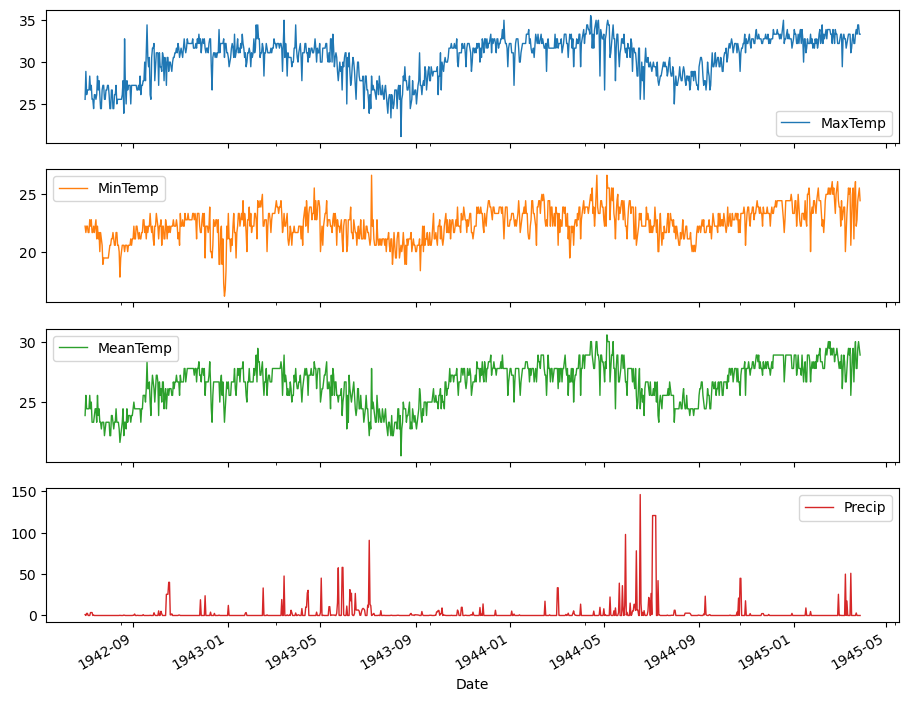

In [103]:
#Convert year to datetime format
data = data[:][:1000]# We take in the first 1000 data since we do not want to cluster bomb the whole plot. 
data['Date'] = pd.to_datetime(data['Date'])

#Indexing the year
data = data.set_index('Date')
axes = data[["MaxTemp", "MinTemp", "MeanTemp", "Precip"]].plot(figsize=(11,9),subplots=True, linewidth = 1)

### Visualization

#### Categorical

In [110]:
data.dtypes

STA           int64
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall     object
YR            int64
MO            int64
DA            int64
MAX         float64
MIN         float64
MEA         float64
SNF          object
Year          int32
dtype: object

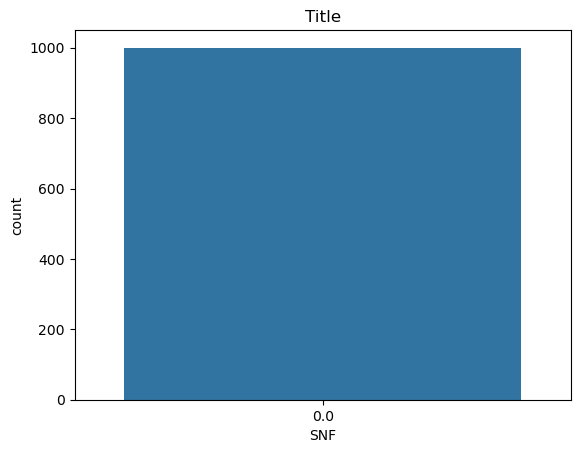

In [112]:
sns.countplot(x='SNF',data=data)
plt.title('Title')
plt.show()

#### Numerical

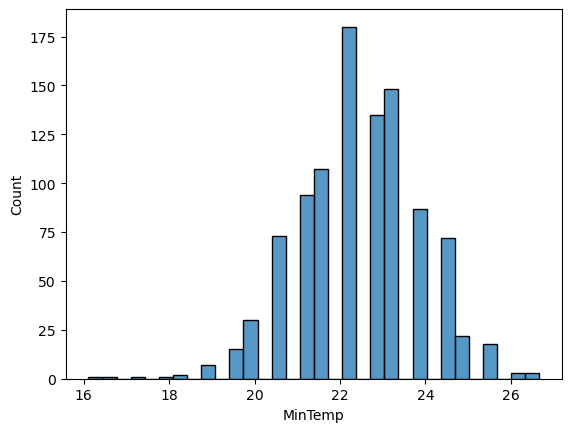

In [123]:
sns.histplot(x = 'MinTemp', data = data)
plt.show()

#### Comparing two features

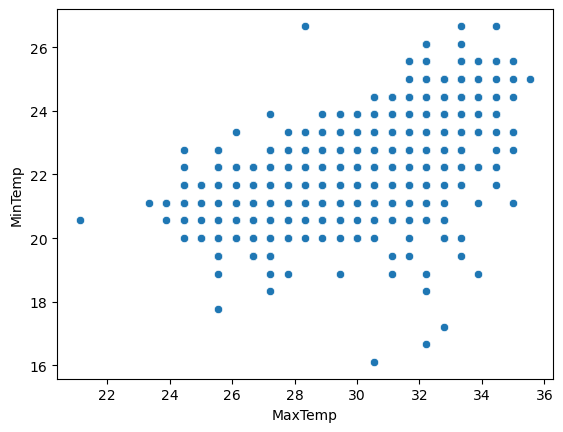

In [121]:
sns.scatterplot(x='MaxTemp', y='MinTemp', data = data)
plt.show()

## END ( Data Visualization & Pre Processing )

### Simple Linear Regression (Miss File)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [145]:
idata = pd.read_csv('iris_csv.csv')

#### Label Encoding

In [146]:
categorical_features = idata.select_dtypes(include= 'object')

In [147]:
labelencoder = LabelEncoder() # label encoder use from here

In [148]:
for i in categorical_features:
    idata[i] = labelencoder.fit_transform(idata[i])

#### Splitting into feature and target

In [149]:
X = idata.drop(columns= 'class')
y = idata['class']

In [150]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 4)

In [151]:
X_train.shape

(120, 4)

In [152]:
X_test.shape

(30, 4)

In [153]:
y_train.shape

(120,)

In [154]:
y_test.shape

(30,)

### Model

In [163]:
model_lr = LogisticRegression()

In [164]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [165]:
yPredict = model_lr.predict(X_test)

In [166]:
idf = pd.DataFrame({'Actual' : y_test,
                   'Predicted' : yPredict})

idf.head()

,Actual,Predicted
128,2,2
18,0,0
130,2,2
105,2,2
107,2,2


-------
## For VIVA

#### Models Classification ( Target Feature = Discrete  -> e.g; Classes(Iris, Fraud etc))
- Logistic Regression (only for binary to works better)
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Machine (only for binary to works better)
- K-Nearest Neighbor

#### Models Regression ( Target Feature = Continous -> e.g; Price,Age, Height, Weather)
- Linear Regression
- Random Forest Regressor
- Decision Tree Regressor
- K-Means Cluster
- Naive Bayes



### Evaluation 

#### For Classification
- Confusion Matrix
- Accuracy
- Recall
- Classification Report

#### For Regression
- R square
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error


---------

### Evaluation

#### Evaluation for Classification

In [218]:
### For Classification 
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report, r2_score

In [184]:
confusion = confusion_matrix(y_test,yPredict)
accuracy = accuracy_score(y_test,yPredict)
report = classification_report(y_test,yPredict)

In [185]:
confusion

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]], dtype=int64)

<Axes: >

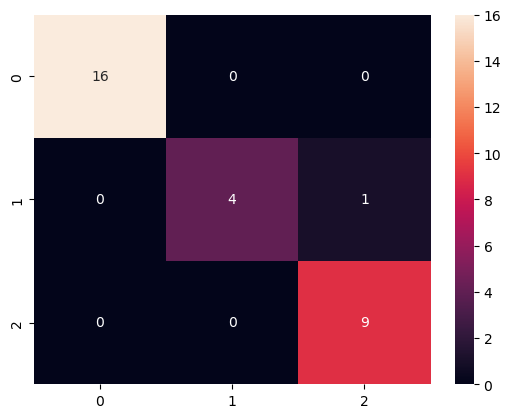

In [190]:
sns.heatmap(confusion,annot=True)  # 2nd way of confusion matrix

In [191]:
accuracy 

0.9666666666666667

In [187]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        16\n           1       1.00      0.80      0.89         5\n           2       0.90      1.00      0.95         9\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.93      0.95        30\nweighted avg       0.97      0.97      0.97        30\n'

#### Evaluation for Regression

In [219]:
# For Regression - Error Evaluations
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,yPredict))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,yPredict))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,yPredict)))
print('R square: ', metrics.r2_score(y_test,yPredict))

Mean Absolute Error:  0.03333333333333333
Mean Squared Error:  0.03333333333333333
Root Mean Squared Error:  0.18257418583505536
R square:  0.9572039942938659


## End of 2nd File

#### Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [199]:
model_dt = DecisionTreeClassifier()

#If miss say criterion then this
model_dt_gini = DecisionTreeClassifier(criterion='gini')
model_dt_entropy = DecisionTreeClassifier(criterion='entropy')

In [200]:
model_dt.fit(X_train, y_train)
model_dt_gini.fit(X_train, y_train)
model_dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [201]:
yPredict_dt = model_dt.predict(X_test)
yPredict_gini = model_dt_gini.predict(X_test)
yPredict_entropy = model_dt_entropy.predict(X_test)

In [204]:
dt_df = pd.DataFrame({'Actual' : y_test ,
                     'Predict DT' : yPredict_dt,
                     'Predict Gini' : yPredict_gini,
                     'Predict Entropy' : yPredict_entropy})

dt_df.head()

,Actual,Predict DT,Predict Gini,Predict Entropy
128,2,2,2,2
18,0,0,0,0
130,2,2,2,2
105,2,2,2,2
107,2,2,2,2


### Plotting Decision Tree

In [205]:
from sklearn import tree

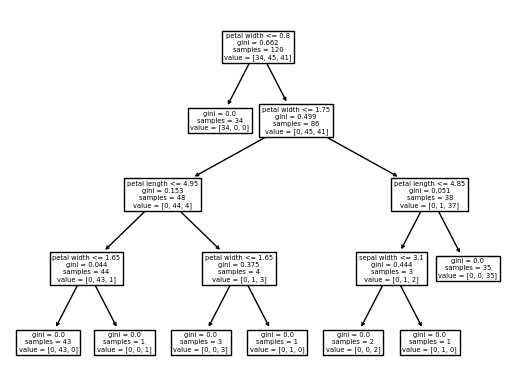

In [213]:
tree.plot_tree(model_dt_gini,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

### Evaluation

In [214]:
accuracy_dt = accuracy_score(y_test, yPredict_dt)
accuracy_dt_gini = accuracy_score(y_test, yPredict_gini)
accuracy_dt_entropy = accuracy_score(y_test, yPredict_entropy)

In [215]:
accuracy_dt

0.9666666666666667

In [216]:
accuracy_dt_gini

0.9666666666666667

In [217]:
accuracy_dt_entropy

0.9666666666666667

# That's it. You are passed!